In [6]:
import numpy as np
import matplotlib.pyplot as plt
from lumicks import pylake
import re

import glob
%matplotlib inline
dire='/mnt/d/OneDrive - Johns Hopkins University/Ha_CCarcamo/Data/C_Trap/2019-10-08 no ATP/kymos h5/'
files = glob.glob(dire+'*Kymograph*.h5')
print("molecule options:",end =" ")
for f in files:
    file = pylake.File(f)
    key = list(file.kymos.keys())[0]
    print(key,end =" ")
k=input("which molecule to look at? ")
for f in files:
    if re.search(r'\s' + k,f):
        filename=f
        print('opening '+filename)

molecule options: 1 3 6 7 long bleached one of two spots 8 9 10 11 12 calibrating hight 13 14 15 removed from channel 16 17 18 19 20 3 min incubation fresh DNA 23 24 25 26 27 28 29 30 31 32 33 34 which molecule to look at? 24
opening /mnt/d/OneDrive - Johns Hopkins University/Ha_CCarcamo/Data/C_Trap/2019-10-08 no ATP/kymos h5/20191008-162423 Kymograph 24.h5


In [7]:
# open file
file = pylake.File(filename)
kymos = list(file.kymos)
kymo_data = file.kymos[kymos[0]]
kymo = file.kymos[kymos[0]]

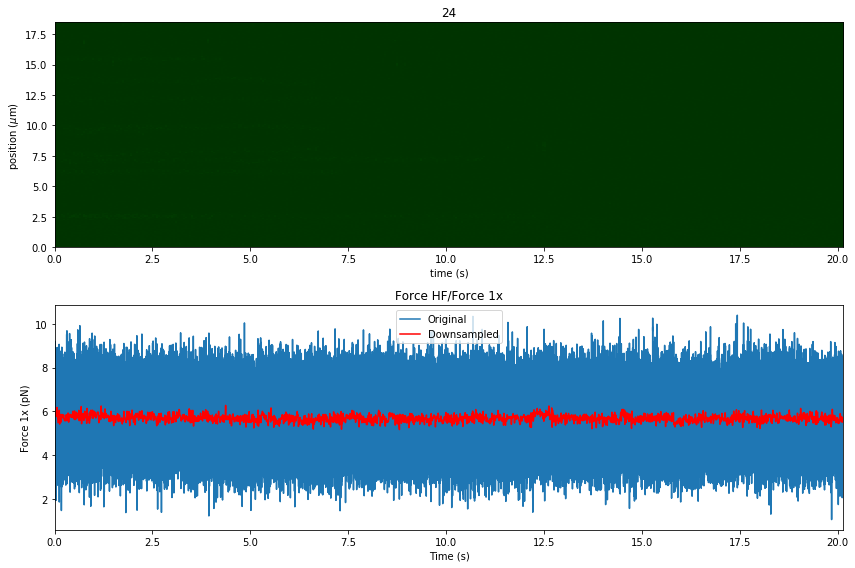

In [9]:
# Without time slicing

fig = plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
kymo.plot_green(vmax=240,vmin=-60,aspect='auto')   #this is the best looking vmax/vmin combo so far

plt.subplot(2,1,2)
# Force in the x direction (pN)
forcex = file['Force HF']['Force 1x']
# time traces (seconds)
time = forcex.timestamps/1e9
time = time - time[0]
sample_rate = forcex.sample_rate
downsampled_rate = 100 # Hz
# downsample the force, nanostage position and time
forcex_downsamp = forcex.downsampled_by(int(sample_rate/downsampled_rate))
time_downsamp = forcex_downsamp.timestamps/1e9
time_downsamp = time_downsamp - time_downsamp[0]
forcex.plot(label="Original")
forcex_downsamp.plot(color='r',label="Downsampled")
plt.ylabel('Force 1x (pN)')
plt.xlim([0,max(time)])
plt.legend()
plt.tight_layout()

#if you want to save
plt.savefig(dire+'kymo+force-'+k+'.png')

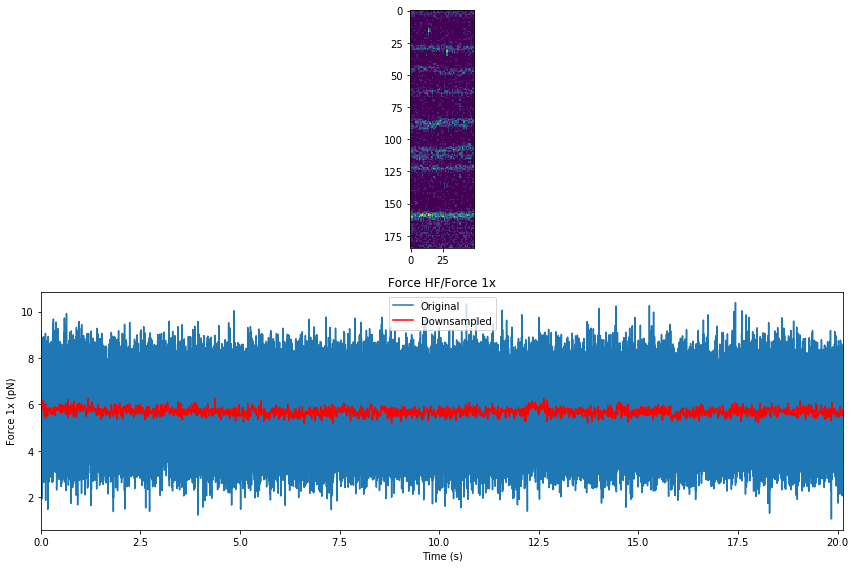

In [10]:
# My attempts at time slicing
fig = plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
greeni = kymo.green_image;
c = [False]*0 + [True]*50 # This is the problem, I am just out of ideas how to fix it
d = np.compress(c, greeni, axis=1)
plt.imshow(d)
# kymo.plot_red(vmax=120,vmin=-30,aspect='auto')   #this is the best looking vmax/vmin combo so far

plt.subplot(2,1,2)
# Force in the x direction (pN)
forcex = file['Force HF']['Force 1x']['0s':'50s']
# time traces (seconds)
time = forcex.timestamps/1e9
time = time - time[0]
sample_rate = forcex.sample_rate
downsampled_rate = 100 # Hz
# downsample the force, nanostage position and time
forcex_downsamp = forcex.downsampled_by(int(sample_rate/downsampled_rate))
time_downsamp = forcex_downsamp.timestamps/1e9
time_downsamp = time_downsamp - time_downsamp[0]
forcex.plot(label="Original")
forcex_downsamp.plot(color='r',label="Downsampled")
plt.ylabel('Force 1x (pN)')
plt.xlim([0,max(time)])
plt.legend()
plt.tight_layout()

#if you want to save
plt.savefig(dire+'kymo+force-'+k+'.png')